# DM의 코드를 정리한 코드

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from networkx.algorithms import community

# ISO-8859-1 인코딩으로 파일 읽기
file_path = '한국직업정보(KNOW)_재직자조사_성격·지식_원자료.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1', low_memory=False)

# 데이터프레임의 모든 문자열 열을 utf-8로 다시 인코딩
def decode_column(column):
    def safe_decode(x):
        if isinstance(x, str):
            try:
                return x.encode('ISO-8859-1').decode('euc-kr')
            except UnicodeDecodeError:
                return x
        return x
    return column.apply(safe_decode)

for column in data.select_dtypes(include=['object']):
    data[column] = decode_column(data[column])

# 열 이름과 데이터프레임의 첫 몇 줄 확인
data.head()

,id,knowcode,knowcode2019,keco07_4digit,keco18_4digit,job,sq1,sq2,sq3,sq4,...,bq27,bq27_1,bq28,bq28_1,bq28_2,bq29,bq30,bq31_1,bq31_2,bq31_3
0,1901110201,11102,11102,111,111,행정부고위공무원,5,5,5,3,...,5,행정학,1,3,,1,40,9000,9000,
1,1901110202,11102,11102,111,111,행정부고위공무원,5,5,5,5,...,4,행정학,1,3,,1,40,7000,7000,
2,1901110203,11102,11102,111,111,행정부고위공무원,5,4,5,5,...,4,철학과,1,3,,1,44,11000,8000,
3,1901110204,11102,11102,111,111,행정부고위공무원,5,4,4,5,...,5,사회복지학,1,1,,1,40,9000,7000,
4,1901110205,11102,11102,111,111,행정부고위공무원,5,5,4,3,...,4,재약학,1,1,,1,45,9300,7500,


In [2]:
# 설문 조사 질문 및 직업 지식 관련 열만 추출
features = data.iloc[:, 6:156]
# 모든 값을 숫자형으로 변환하고, 변환할 수 없는 값은 0으로 대체
features = features.apply(pd.to_numeric, errors='coerce').fillna(0)
# 코사인 유사도 계산
similarity_matrix = cosine_similarity(features)
# 유사도 기반으로 네트워크 구성
G = nx.Graph()
# 노드 추가
for i, job in enumerate(data['job']):
    G.add_node(i, label=job)

# 엣지 추가 (유사도가 높은 경우에만 엣지 추가)
for i in range(len(similarity_matrix)):
    for j in range(i+1, len(similarity_matrix)):
        if similarity_matrix[i][j] > 0.8:  # 유사도가 0.8 이상인 경우에만 엣지 추가
            G.add_edge(i, j, weight=similarity_matrix[i][j])

# 네트워크 시각화
pos = nx.spring_layout(G, seed=42)  # 레이아웃 설정
plt.figure(figsize=(15, 15))
nx.draw_networkx_nodes(G, pos, node_size=50)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, {i: job for i, job in enumerate(data['job'])}, font_size=8)
plt.title('Job Similarity Network')
plt.show()

KeyboardInterrupt: 

# 위의 코드를 정리 및 데이터 축소 그리고 결과

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from networkx.algorithms import community

# ISO-8859-1 인코딩으로 파일 읽기
file_path = '한국직업정보(KNOW)_재직자조사_성격·지식_원자료.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1', low_memory=False)

# 데이터프레임의 모든 문자열 열을 utf-8로 다시 인코딩
def decode_column(column):
    def safe_decode(x):
        if isinstance(x, str):
            try:
                return x.encode('ISO-8859-1').decode('euc-kr')
            except UnicodeDecodeError:
                return x
        return x
    return column.apply(safe_decode)

for column in data.select_dtypes(include=['object']):
    data[column] = decode_column(data[column])

# 열 이름과 데이터프레임의 첫 몇 줄 확인
data.head()

,id,knowcode,knowcode2019,keco07_4digit,keco18_4digit,job,sq1,sq2,sq3,sq4,...,bq27,bq27_1,bq28,bq28_1,bq28_2,bq29,bq30,bq31_1,bq31_2,bq31_3
0,1901110201,11102,11102,111,111,행정부고위공무원,5,5,5,3,...,5,행정학,1,3,,1,40,9000,9000,
1,1901110202,11102,11102,111,111,행정부고위공무원,5,5,5,5,...,4,행정학,1,3,,1,40,7000,7000,
2,1901110203,11102,11102,111,111,행정부고위공무원,5,4,5,5,...,4,철학과,1,3,,1,44,11000,8000,
3,1901110204,11102,11102,111,111,행정부고위공무원,5,4,4,5,...,5,사회복지학,1,1,,1,40,9000,7000,
4,1901110205,11102,11102,111,111,행정부고위공무원,5,5,4,3,...,4,재약학,1,1,,1,45,9300,7500,


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50557 (\N{HANGUL SYLLABLE YAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

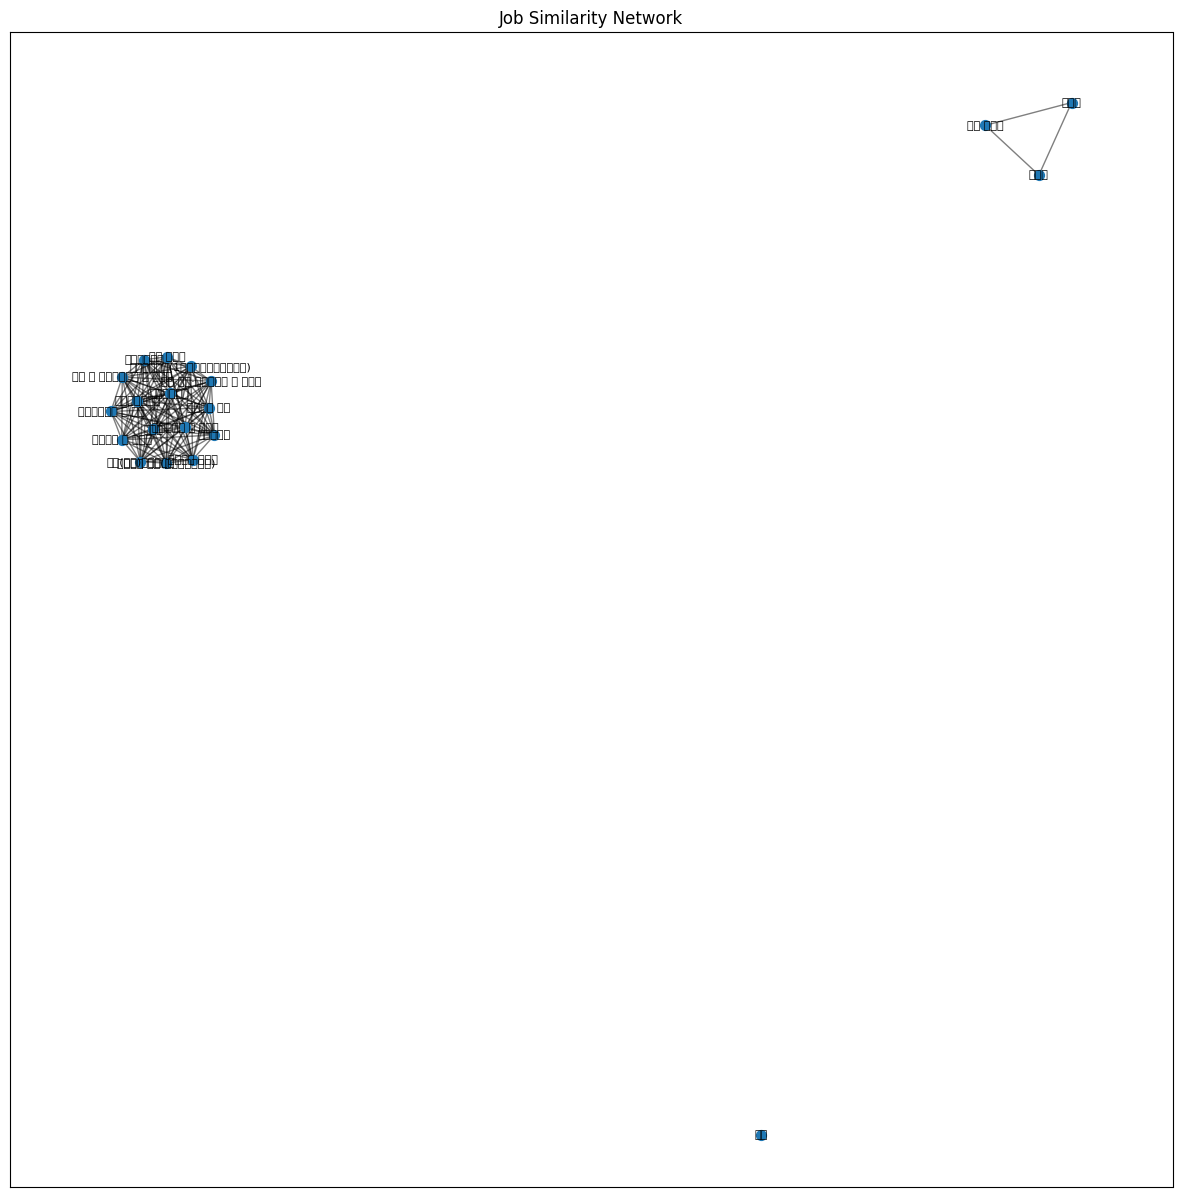

In [4]:
# 데이터의 샘플 크기를 줄이기 (예: 20개의 샘플만 사용)
sample_data = data.sample(n=20, random_state=42)         #(1000,42 좋은 것 같기도)

# 설문 조사 질문 및 직업 지식 관련 열만 추출
features = sample_data.iloc[:, 6:156]
# 모든 값을 숫자형으로 변환하고, 변환할 수 없는 값은 0으로 대체
features = features.apply(pd.to_numeric, errors='coerce').fillna(0)

# 코사인 유사도 계산
similarity_matrix = cosine_similarity(features)

# 유사도 기반으로 네트워크 구성
G = nx.Graph()

# 노드 추가
for i, job in enumerate(sample_data['job']):
    G.add_node(i, label=job)

# 엣지 추가 (유사도가 높은 경우에만 엣지 추가)
for i in range(len(similarity_matrix)):
    for j in range(i+1, len(similarity_matrix)):
        if similarity_matrix[i][j] > 0.8:  # 유사도가 0.8 이상인 경우에만 엣지 추가
            G.add_edge(i, j, weight=similarity_matrix[i][j])

# 네트워크 시각화
pos = nx.spring_layout(G, seed=42)  # 레이아웃 설정
plt.figure(figsize=(15, 15))
nx.draw_networkx_nodes(G, pos, node_size=50)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, {i: job for i, job in enumerate(sample_data['job'])}, font_size=8)
plt.title('Job Similarity Network')
plt.show()

In [5]:
from networkx.algorithms import community

# Louvain 알고리즘을 사용하여 커뮤니티 탐지
communities = community.louvain_communities(G, seed=42)

# 각 군집에 포함된 직업들 출력
for i, comm in enumerate(communities):
    print(f"군집 {i+1}:")
    for node in comm:
        print(sample_data['job'].iloc[node])
    print("\n")


군집 1:
노무사
구두 미화원
미용사


군집 2:
약학연구원
특수교육 교사
사진작가 및 사진사
초등학교교장 및 교감
점화·발파·화약관리원 및 삭구원
웹프로그래머
재료(금속)공학기술자
중식 조리사
영상 및 관련장비설치 및 수리원
요양간호사 및 간병인
사회단체활동가
정치학연구원
건축구조 기술자
웹방송전문가(1인미디어콘텐츠제작자)
재활공학 기사(의지보조기기사)
방수공


군집 3:
성우




In [ ]:
# Degree 중심성 계산
degree_centrality = nx.degree_centrality(G)

# Degree 중심성을 기준으로 상위 10개의 직업 추출
top_10_jobs = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# 상위 10개의 직업 출력
print("상위 10개의 직업 (Degree 중심성 기준):")
for node, centrality in top_10_jobs:
    print(f"{sample_data['job'].iloc[node]}: {centrality}")


상위 10개의 직업 (Degree 중심성 기준):
약학연구원: 0.7894736842105263
특수교육 교사: 0.7894736842105263
사진작가 및 사진사: 0.7894736842105263
초등학교교장 및 교감: 0.7894736842105263
점화·발파·화약관리원 및 삭구원: 0.7894736842105263
웹프로그래머: 0.7894736842105263
재료(금속)공학기술자: 0.7894736842105263
중식 조리사: 0.7894736842105263
영상 및 관련장비설치 및 수리원: 0.7894736842105263
요양간호사 및 간병인: 0.7894736842105263


# K-means 알고리즘 (아래 말고 위가 더 보기 좋다)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50557 (\N{HANGUL SYLLABLE YAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)

군집 1:
미용사
구두 미화원
성우
노무사


군집 2:
초등학교교장 및 교감
점화·발파·화약관리원 및 삭구원
정치학연구원


군집 3:
약학연구원
특수교육 교사
사진작가 및 사진사
웹프로그래머
재료(금속)공학기술자
중식 조리사
영상 및 관련장비설치 및 수리원
요양간호사 및 간병인
사회단체활동가
건축구조 기술자
웹방송전문가(1인미디어콘텐츠제작자)
재활공학 기사(의지보조기기사)
방수공




/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47144 (\N{HANGUL SYLLABLE RYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49444 (\N{HANGUL SYLLABLE SEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-pack

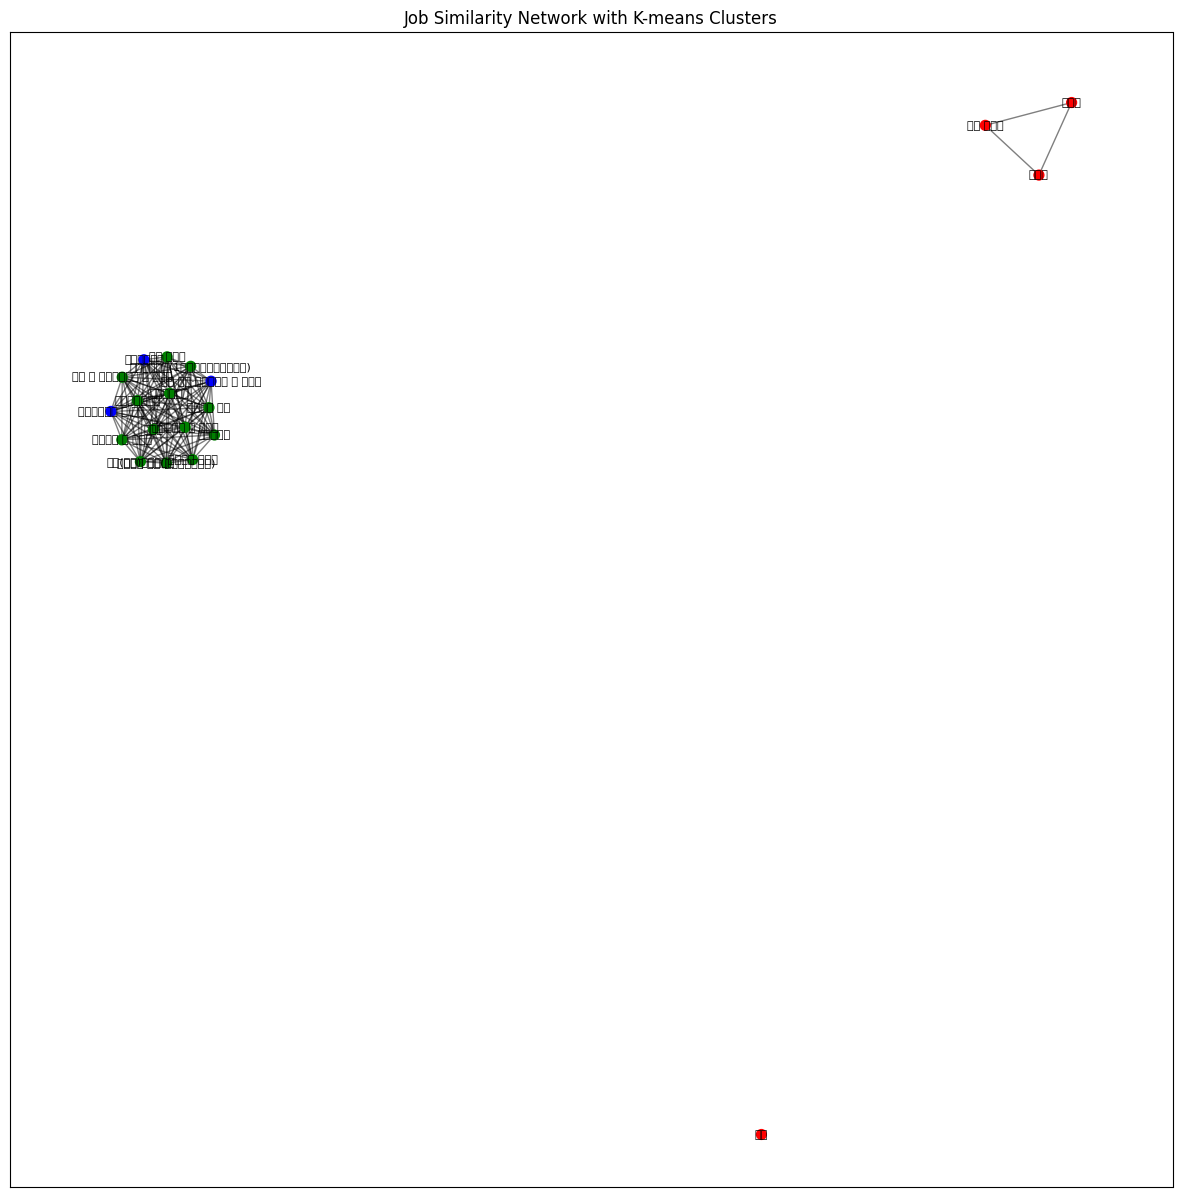

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans

# ISO-8859-1 인코딩으로 파일 읽기
data = pd.read_csv('한국직업정보(KNOW)_재직자조사_성격·지식_원자료.csv', encoding='ISO-8859-1', low_memory=False)

# 데이터프레임의 모든 문자열 열을 utf-8로 다시 인코딩
def decode_column(column):
    def safe_decode(x):
        if isinstance(x, str):
            try:
                return x.encode('ISO-8859-1').decode('euc-kr')
            except UnicodeDecodeError:
                return x
        return x
    return column.apply(safe_decode)

for column in data.select_dtypes(include=['object']):
    data[column] = decode_column(data[column])

# 데이터의 샘플 크기를 줄이기 (예: 20개의 샘플만 사용)
sample_data = data.sample(n=20, random_state=42)

# 설문 조사 질문 및 직업 지식 관련 열만 추출
features = sample_data.iloc[:, 6:156]
# 모든 값을 숫자형으로 변환하고, 변환할 수 없는 값은 0으로 대체
features = features.apply(pd.to_numeric, errors='coerce').fillna(0)

# K-means 알고리즘을 사용하여 군집화
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features)
clusters = kmeans.labels_

# 각 군집에 포함된 직업들 출력
for i in range(3):
    print(f"군집 {i+1}:")
    for idx in range(len(clusters)):
        if clusters[idx] == i:
            print(sample_data['job'].iloc[idx])
    print("\n")

# 코사인 유사도 계산
similarity_matrix = cosine_similarity(features)

# 유사도 기반으로 네트워크 구성
G = nx.Graph()

# 노드 추가
for i, job in enumerate(sample_data['job']):
    G.add_node(i, label=job, cluster=clusters[i])

# 엣지 추가 (유사도가 높은 경우에만 엣지 추가)
for i in range(len(similarity_matrix)):
    for j in range(i+1, len(similarity_matrix)):
        if similarity_matrix[i][j] > 0.8:  # 유사도가 0.8 이상인 경우에만 엣지 추가
            G.add_edge(i, j, weight=similarity_matrix[i][j])

# 네트워크 시각화
pos = nx.spring_layout(G, seed=42)  # 레이아웃 설정
plt.figure(figsize=(15, 15))

# 노드 색상 설정 (군집별로 다르게)
colors = ['red', 'blue', 'green']
node_colors = [colors[G.nodes[node]['cluster']] for node in G.nodes]

nx.draw_networkx_nodes(G, pos, node_size=50, node_color=node_colors)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, {i: job for i, job in enumerate(sample_data['job'])}, font_size=8)
plt.title('Job Similarity Network with K-means Clusters')
plt.show()
